In [16]:
# Data needs to be cleaned more, this model can be used as a sample test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers

In [17]:
df = pd.read_csv("la_cleaned.csv")

In [18]:
dropped = ['price', 'id']
X = df.drop(dropped, axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[23:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1959
Validation MSE: 0.2009

Training r2: 0.7007
Validation r2: 0.7059


In [20]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
host_listings_count_69.0,0.000000
host_listings_count_55.0,0.000000
host_listings_count_1318.0,0.000000
host_listings_count_1461.0,0.000000
host_listings_count_unknown,0.000000
...,...
hot_tub_sauna_or_pool,0.035225
property_type_Hotel,0.035411
room_type_Entire home/apt,0.093261
accommodates,0.095196


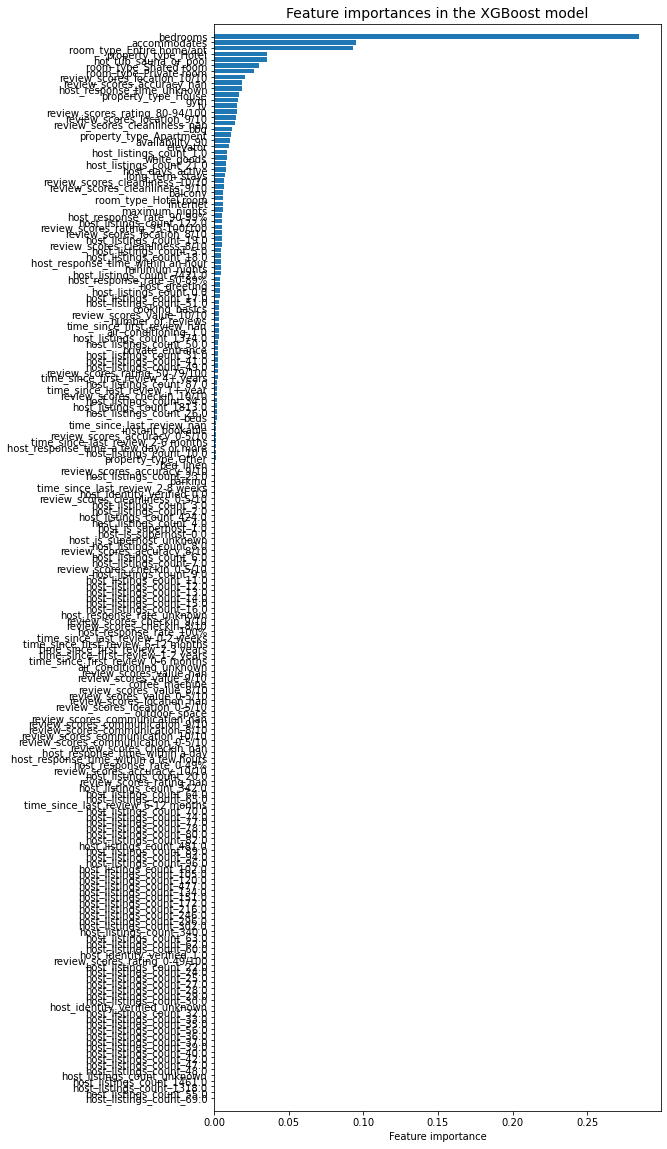

In [21]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [22]:
xgb_reg.save_model('la_model.bin')